In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from keras import backend as k
import matplotlib.pyplot as plt

#from tf_keras_vis.saliency import Saliency 


In [7]:
model = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
#layer_dict =dict([layer.name, layer] for layer in model.layers)

In [8]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from PIL import Image
import numpy as np

im1 = Image.open('/content/drive/MyDrive/image/bird.jpeg')
im2 = Image.open('/content/drive/MyDrive/image/bird2.jpeg')
im3 = Image.open('/content/drive/MyDrive/image/dog.jpeg')
im4 = Image.open('/content/drive/MyDrive/image/maybedog.jpeg')
#width, height = im.size
def resize(inp):
  newsize = (224, 224)
  inp = inp.resize(newsize)
  return inp

image1=resize(im1)
image2=resize(im2)
image3=resize(im3)
image4=resize(im4) 
images = np.asarray([np.array(image1), np.array(image2), np.array(image3), np.array(image4)])


In [17]:
def saliencymap(img, clp=None):
  for i in range(len(img)):
    x = np.expand_dims(img[i], axis=0)
    x = tf.Variable(x, dtype=tf.float32)
    
    with tf.GradientTape() as tape:
      preds = model(x)
      y = tf.gather(preds, tf.argmax(preds, axis=-1), axis=-1)[0]
    
    dy = tape.gradient(y, x)
    
    labels = np.argmax(preds.numpy(), axis=-1)
    dy = tf.reduce_max(dy, axis=-1).numpy()

    norm = lambda p : ((p - np.min(p)) / (np.max(p) - np.min(p) + 1e-6))

    map = norm(dy)

    if clp is not None:
      map = np.clip(map, clp, 1.0)
      map = norm(map)
    
    fig = plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.imshow(tf.cast(x[0], dtype=tf.uint8))
    plt.title(f'Input Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(map[0])
    plt.title(f'Prediction Label: {labels[0]}')
    plt.axis('off')
    plt.show()

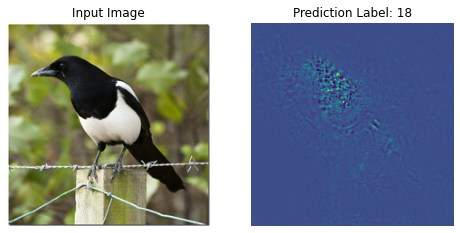

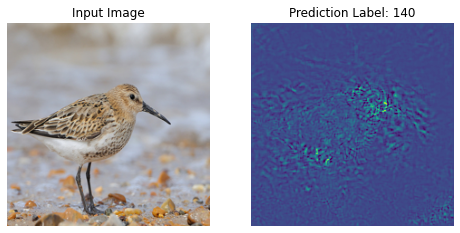

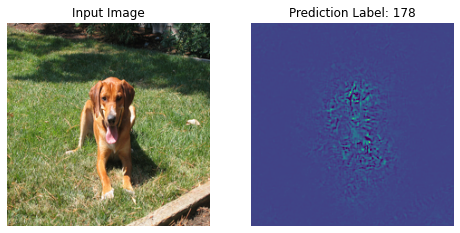

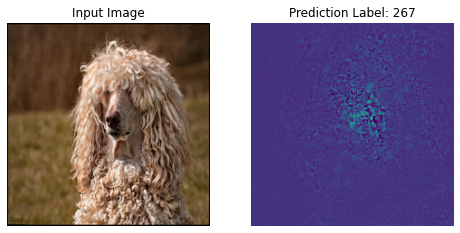

In [18]:
saliencymap(images, clp=0.25)